In [1]:
# This project aims to 
# firstly, predict the price of HDFC Bank stock using the time series data collected for the past 10 years and 
# secondly, manage a portfolio to maximize returns after the Covid-19 market crash.


# Let's import the necessary libraries first

import pandas as pd
import numpy as np
import math
import pandas_datareader as web
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
# Getting the market data of HDFC Bank

df=yf.download('HDFCBANK.NS',start='2013-01-01',end='2023-10-01')

# Displaying the data

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,341.049988,342.549988,339.825012,342.250000,315.591309,2014606
2013-01-02,344.950012,345.000000,341.524994,343.674988,316.905304,4854798
2013-01-03,345.000000,345.000000,340.200012,341.674988,315.061096,4571366
2013-01-04,342.500000,342.500000,336.399994,339.674988,313.216858,5442254
2013-01-07,341.850006,341.850006,333.000000,334.100006,308.076141,5502284
...,...,...,...,...,...,...
2023-09-25,1525.000000,1540.699951,1525.000000,1531.000000,1531.000000,20104377
2023-09-26,1525.000000,1540.000000,1525.000000,1537.650024,1537.650024,13787654
2023-09-27,1523.000000,1532.500000,1515.000000,1526.849976,1526.849976,19669269


In [3]:
# Number of data entries and number of attributes of the data frame

df.shape

(2653, 6)

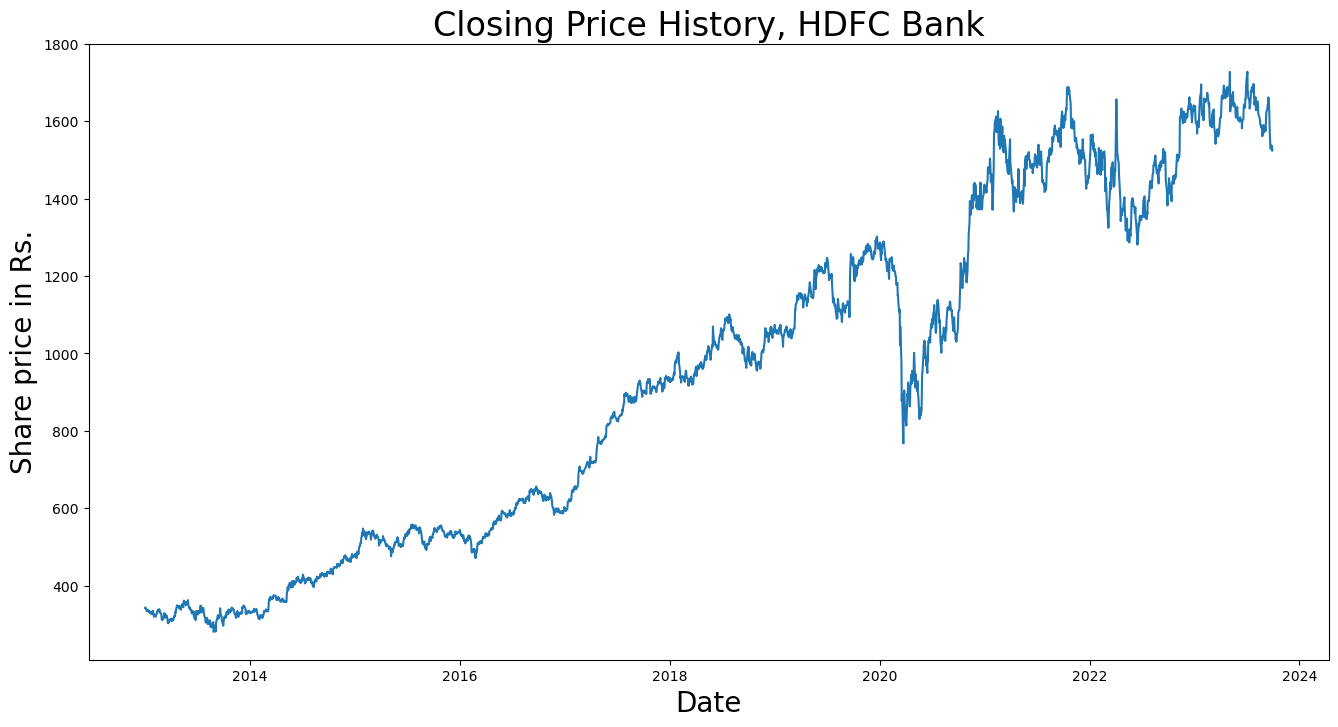

In [4]:
# Plotting the closing prices of HDFC Bank

plt.figure(figsize=(16,8))
plt.title('Closing Price History, HDFC Bank',fontsize=24)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=20)
plt.ylabel('Share price in Rs.',fontsize=20)
plt.show()

In [5]:
# As our primary concern is the closing price of the stock
# Let's modify the data frame so that it only contains the closing price

data=df.filter(['Close'])
data

,Close
Date,
2013-01-01,342.250000
2013-01-02,343.674988
2013-01-03,341.674988
2013-01-04,339.674988
2013-01-07,334.100006
...,...
2023-09-25,1531.000000
2023-09-26,1537.650024
2023-09-27,1526.849976


In [6]:
# Converting data to a numpy array to better modify it

dataset=data.values

# Specifying training data len, 80% or 0.8

len_of_training_data=math.ceil(len(dataset)*0.8)
len_of_training_data

2123

In [7]:
# Scaling the data

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.04235619],
       [0.0433408 ],
       [0.04195887],
       ...,
       [0.86087408],
       [0.85869752],
       [0.8604941 ]])

In [8]:
# Creating the training data

train_data=scaled_data[0:len_of_training_data,:]

# Specifying the x_train and y_train

x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print("x_train data\n",x_train)
        print("y_train data\n",y_train)
        print()

x_train data
 [array([0.04235619, 0.0433408 , 0.04195887, 0.04057694, 0.03672482,
       0.03743306, 0.03648298, 0.03935048, 0.03710484, 0.03710484,
       0.03675936, 0.0340646 , 0.03624114, 0.03487647, 0.0333909 ,
       0.03173259, 0.03271721, 0.0339955 , 0.03563654, 0.0374676 ,
       0.03128347, 0.0327345 , 0.02803592, 0.02703403, 0.02936604,
       0.02841596, 0.02680946, 0.02750042, 0.0304543 , 0.03283814,
       0.03568837, 0.03534289, 0.039005  , 0.03967869, 0.03941958,
       0.039005  , 0.0397478 , 0.03605112, 0.03365001, 0.0326654 ,
       0.03086888, 0.02793228, 0.02192087, 0.02093625, 0.0227155 ,
       0.02454655, 0.02370011, 0.02760407, 0.03295905, 0.03225081,
       0.02836413, 0.02522025, 0.03017792, 0.02677492, 0.02812229,
       0.02406287, 0.0219727 , 0.01558127, 0.01497667, 0.01641043])]
y_train data
 [0.01817238825505149]

x_train data
 [array([0.04235619, 0.0433408 , 0.04195887, 0.04057694, 0.03672482,
       0.03743306, 0.03648298, 0.03935048, 0.03710484, 0.037

In [9]:
# Converting x_train and y_train to numpy arrays

x_train,y_train=np.array(x_train),np.array(y_train)

# Reshaping the data

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))  # rows, columns
x_train.shape

(2063, 60, 1)

In [10]:
# Building the LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
# Compiling the model

model.compile(optimizer='adam',loss='mean_squared_error')

In [12]:
# Training the model

model.fit(x_train,y_train,batch_size=1,epochs=5)

Epoch 1/5
2063/2063 [==============================] - 26s 12ms/step - loss: 0.0011
Epoch 2/5
2063/2063 [==============================] - 23s 11ms/step - loss: 5.3100e-04
Epoch 3/5
2063/2063 [==============================] - 23s 11ms/step - loss: 3.8420e-04
Epoch 4/5
2063/2063 [==============================] - 23s 11ms/step - loss: 2.8105e-04
Epoch 5/5
2063/2063 [==============================] - 24s 11ms/step - loss: 2.8479e-04


In [13]:
# Creating the testing data set

test_data=scaled_data[len_of_training_data-60:,:]

x_test=[]
y_test=dataset[len_of_training_data:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [14]:
# Converting test data to numpy array

x_test=np.array(x_test)

In [15]:
# Reshaping data as LSTM Model expects 3D data and ours is currently 2D

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [16]:
# Getting the predicted prices

predictions=model.predict(x_test)

# Unscaling the prediction values to check against y_test

predictions=scaler.inverse_transform(predictions)

17/17 [==============================] - 1s 8ms/step


In [17]:
# Getting the Root Mean Square Error, the lower the better

rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

3.245201485112028

C:\Users\harma\AppData\Local\Temp\ipykernel_39212\3615868947.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


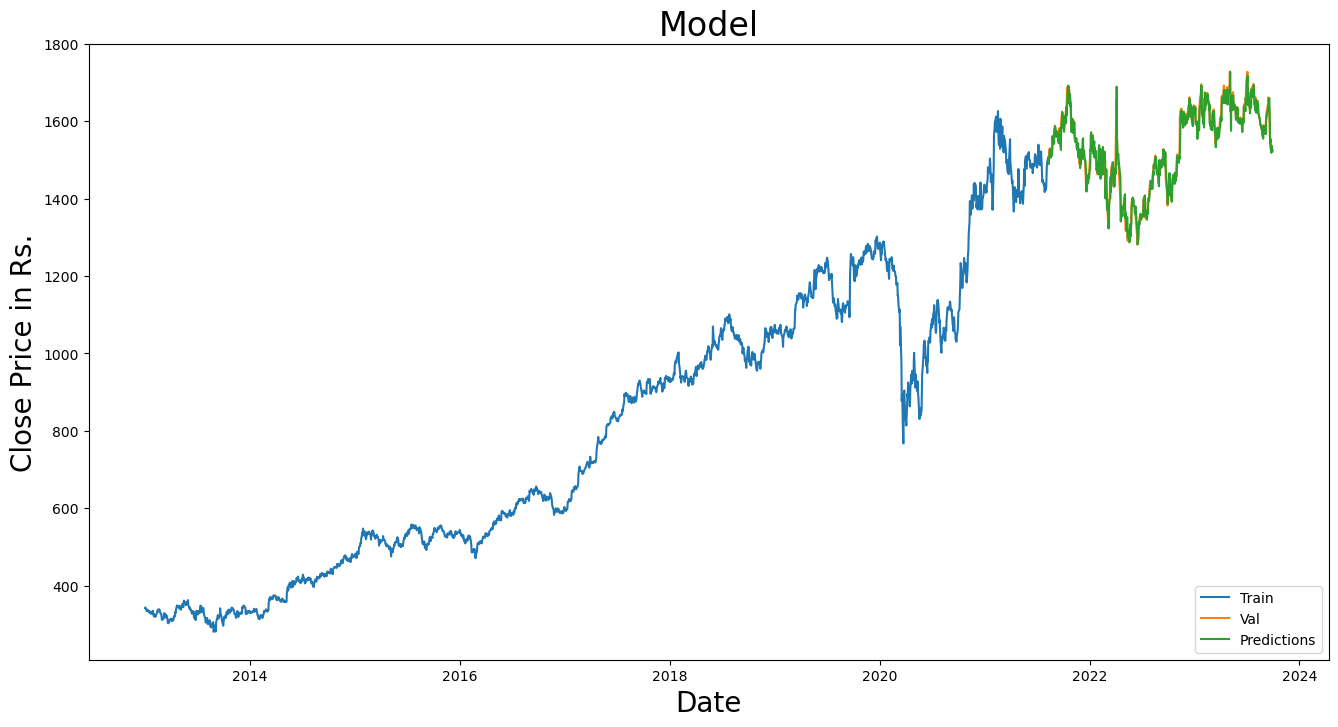

In [18]:
# Plotting the data

train=data[:len_of_training_data]
valid=data[len_of_training_data:]
valid['Predictions']=predictions

# Visualising the data

plt.figure(figsize=(16,8))
plt.title('Model',fontsize=24)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price in Rs.',fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [19]:
# Displaying actual vs predicted prices

valid

,Close,Predictions
Date,,
2021-08-12,1501.400024,1489.879150
2021-08-13,1526.199951,1502.906006
2021-08-16,1530.599976,1528.455566
2021-08-17,1514.650024,1524.517090
2021-08-18,1513.000000,1506.308228
...,...,...
2023-09-25,1531.000000,1518.689697
2023-09-26,1537.650024,1531.982056
2023-09-27,1526.849976,1535.290649


In [22]:
# Predicting Price

hdfc=yf.download('HDFCBANK.NS',start='2013-01-01',end='2023-10-06')
new_df=hdfc.filter(['Close'])
latest_60_vals=new_df[-60:].values
latest_60_vals_scaled=scaler.transform(latest_60_vals)
X_test=[]
X_test.append(latest_60_vals_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_price=model.predict(X_test)
predicted_price=scaler.inverse_transform(predicted_price)
print(predicted_price)

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 25ms/step
[[1533.5894]]


In [23]:
hdfc2=yf.download('HDFCBANK.NS',start='2023-10-06',end='2023-10-07')
print(hdfc2['Close'])

[*********************100%%**********************]  1 of 1 completed
Date
2023-10-06    1534.050049
Name: Close, dtype: float64


In [42]:
percent_error=abs((hdfc2['Close'][-1]-hdfc['Close'][-1])/hdfc['Close'][-1])*100
percent_error

0.11069192068207717

In [36]:
# The closeness to actual price

print("The accuracy of prediction is",round(100-percent_error,2))

The accuracy of prediction is 99.89
